# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [24]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [25]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [26]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [27]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html)

In [28]:
# Extract all rows of data

# one way to do it
# rows = soup.select("table.table > tbody > tr.data-row")  # skips header row

# another way to do it
table = soup.find('table', class_='table')
rows = table.find_all('tr', class_='data-row')
print(f'There are {len(rows)} rows of data.')
#rows

There are 1867 rows of data.


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = []
    for cell in row.select('td'):
        row_data.append(cell.text.strip())
    table_data.append(row_data)

# this value should be the same as the number of rows
print(f'There are {len(table_data)} non-header rows in the table.')

There are 1867 non-header rows in the table.


In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(table_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [31]:
# Confirm DataFrame was created successfully
print('The first five rows of the mars_weather_df:')
print('-'*50)
mars_weather_df.head()

The first five rows of the mars_weather_df:
--------------------------------------------------


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [32]:
# Examine data type of each column
print('Data types of each column:')
print('-'*50)
mars_weather_df.dtypes

Data types of each column:
--------------------------------------------------


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [33]:
# Change data types for data analysis
mars_weather_df = mars_weather_df.astype({#'id': 'int32',
                'terrestrial_date': 'datetime64[ns]',
                'sol': 'int32',
                'ls': 'int32',
                'month': 'int32',
                'min_temp': float,
                'pressure': float}
                )

In [34]:
# Confirm type changes were successful by examining data types again
print('Data types of each column:')
print('-'*50)
mars_weather_df.dtypes

Data types of each column:
--------------------------------------------------


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [35]:
# 1. How many months are there on Mars?

# Count the number of unique months in the 'month' column
month_count = mars_weather_df['month'].nunique()

# Print result
print(f'There are {month_count} months on Mars.')

There are 12 months on Mars.


In [36]:
# 2. How many sols (Martian days) worth of data are there?

# Count the unique values in the 'sol' column to find the number of Martian days
day_count = mars_weather_df['sol'].nunique()

# Display result
print(f'There are {day_count} Martian days of data in the table.')

There are 1867 Martian days of data in the table.


In [37]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print('Average minimum temperature by month:')
print('-'*50)
avg_min_temp_by_month

Average minimum temperature by month:
--------------------------------------------------


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

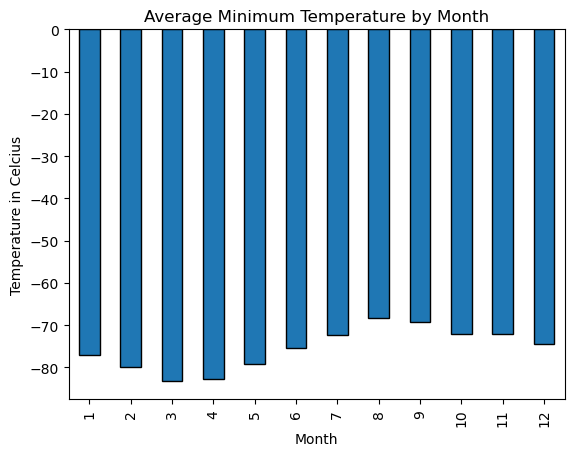

In [38]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot.bar(x = avg_min_temp_by_month.index, 
                               y = avg_min_temp_by_month.values, 
                               edgecolor = 'black',
                               xlabel = 'Month',
                               ylabel = 'Temperature in Celcius',
                               title = 'Average Minimum Temperature by Month'
                               )
# Save the plot as a image file
plt.savefig('output/avg_min_temp_by_month.png')
# Show plot
plt.show()

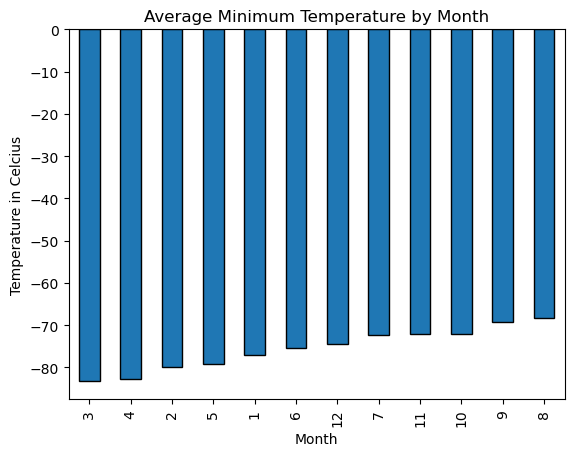

Coldest Month: 3 
Hottest Month: 8


In [39]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the values in ascending order
avg_min_temp_by_month = avg_min_temp_by_month.sort_values()
# Plot the values to obtain the hottest and coldest month
avg_min_temp_by_month.plot.bar(x = avg_min_temp_by_month.index,
                                y = avg_min_temp_by_month.values, 
                                edgecolor = 'black',
                                xlabel = 'Month', 
                                ylabel = 'Temperature in Celcius',
                                title = 'Average Minimum Temperature by Month'
                                )
# Save the plot as a image file
plt.savefig('output/avg_min_temp_by_month_sorted.png')
# Show plot
plt.show()

# Print the result
print(f'Coldest Month: {avg_min_temp_by_month.index[0]} \nHottest Month: {avg_min_temp_by_month.index[11]}')


In [40]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
print('Average pressure by month:')
print('-'*50)
avg_pressure_by_month

Average pressure by month:
--------------------------------------------------


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

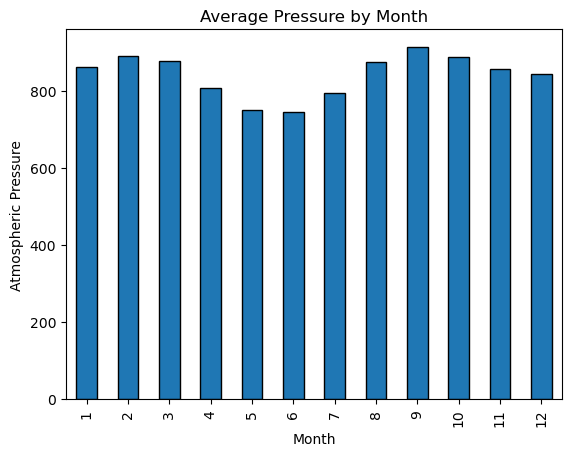

In [41]:
# Plot the average pressure by month
avg_pressure_by_month.plot.bar(x = avg_pressure_by_month.index,
                               y = avg_pressure_by_month.values,
                               edgecolor = 'black', 
                               xlabel = 'Month', 
                               ylabel = 'Atmospheric Pressure',
                               title = 'Average Pressure by Month'
                               )
# Save the plot as a image file
plt.savefig('output/avg_pressure_by_month.png')
# Show plot
plt.show()

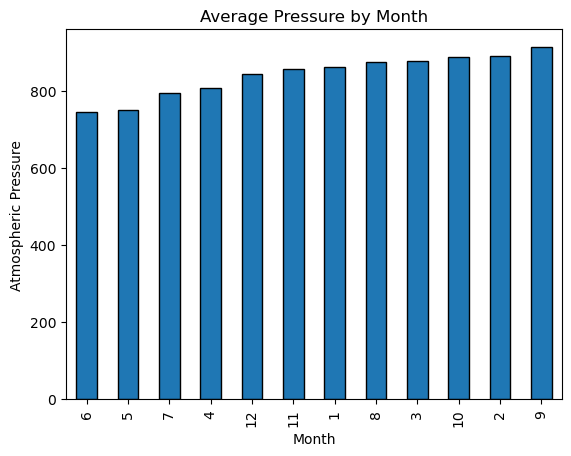

Lowest Pressure Month: 6 
Highest Pressure Month: 9


In [42]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the values in ascending order
avg_pressure_by_month = avg_pressure_by_month.sort_values()
# Plot the values to obtain the lowest and highest pressure months
avg_pressure_by_month.plot.bar(x = avg_pressure_by_month.index,
                               y = avg_pressure_by_month.values, 
                               edgecolor = 'black',
                               xlabel = 'Month', 
                               ylabel = 'Atmospheric Pressure',
                               title = 'Average Pressure by Month')
# Save the plot as a image file
plt.savefig('output/avg_pressure_by_month_sorted.png')
# Show plot
plt.show()

# Print the result
print(f'Lowest Pressure Month: {avg_pressure_by_month.index[0]} \nHighest Pressure Month: {avg_pressure_by_month.index[11]}')

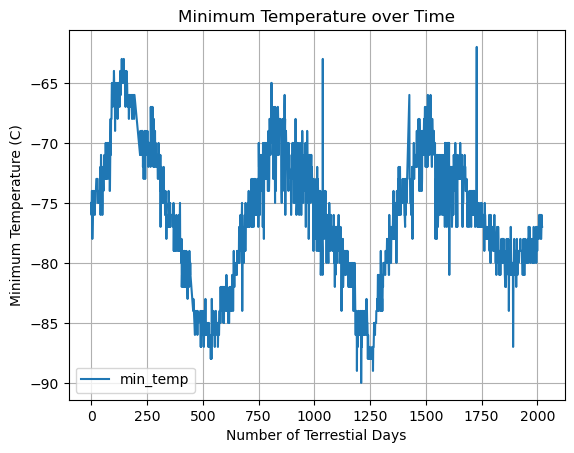

In [43]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# First create a new column that gives the difference in terrestrial days from the first datapoint 
# This is necessary for the correct x-values because there are missing terrestraial days, so we cannot use the index,
# and sols are not quite identical to terrestral days (they are 40 minutes longer)

delta_days_list = []
for i in range(len(mars_weather_df)):
    delta = mars_weather_df['terrestrial_date'][i] - mars_weather_df['terrestrial_date'][0] # difference in terrestraial days from the first datapoint 
    delta_days_list.append(delta.days)
mars_weather_df['delta_days'] = delta_days_list # create new column
mars_weather_df

# Create a plot that looks at min_temp and the count of terrestial_date 
mars_weather_df.plot.line(x = 'delta_days', 
                          y = 'min_temp', 
                          title = 'Minimum Temperature over Time', 
                          grid = True,
                          xlabel = 'Number of Terrestial Days',
                          ylabel = 'Minimum Temperature (C)'
                          )
# Save the plot as a image file
plt.savefig('output/min_temp_vs_day_count.png')
# Show plot
plt.show()

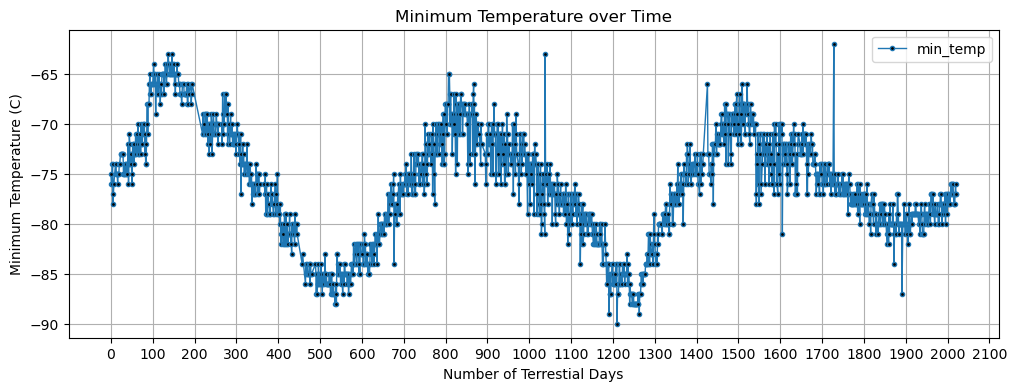

In [44]:
# Create a plot that looks at min_temp and the count of terrestial_date 
mars_weather_df.plot.line(x = 'delta_days', 
                          y = 'min_temp', 
                          style = '-o',
                          linewidth = 1,
                          ms = 3,
                          mfc = 'black',
                          title = 'Minimum Temperature over Time', 
                          grid = True,
                          xlabel = 'Number of Terrestial Days',
                          ylabel = 'Minimum Temperature (C)',
                          figsize=(12,4),
                          xticks=list(range(0,2200,100))
                          )
# Save the plot as a image file
plt.savefig('output/min_temp_vs_day_count_2.png')

#### Minimum Temperature

On average, minimum tempearture on Mars is lowest in the third month and highest in the eighth month. Assuming minimum temperature is a good proxy for average temperature on Mars, the third month is the coldest and the eighth month is the warmest.

We can dive into this in a bit more detail. The bar chart for average minimum temperature by month, ordered by month, shows that the average minimum temperature by month roughly follows a sinusoidal pattern with a period of twelve months, with a valley around Months 3/4 and a peak around Months 8/9.

Notice that the minimum temperatures are always between -70 to -80 degrees Celcius....brrr!

#### Atmospheric Pressure

On average, atmospheric pressure is lowest in the sixth month and highest in the ninth month. 

We can dive into this in a bit more detail. The bar chart for average pressure by month, ordered by month, shows that the average atmospheric pressure by month roughly follows a sinusolidal pattern with a period of six months, with valleys on Month 6 and Month 12 and peaks on Month 3 and Month 9.

#### Year Length

We can use the graph of minimum temperature vs. terrestrial days to estimate the number of terrestrial days in a Martian year by looking at the peak-to-peak or trough-to-trough distances. The graph with the smaller horizontal:vertical aspect matches that in the Module Challenge description, but the graph that has a larger horizontal:vertical aspect ratio is more useful for measuring peak-to-peak and trough-to-trough.

Peak-to-Peak

830 - 140 = 690

1520 - 830 = 690

Trough-to-Trough

1230 - 540 = 690

So a year on Mars appears to be around 690 days. Internet search confirms that a Mars year is equivalent to 687 earth days.

(Note: The x-axis is the number of terrestrial days. In order to get this from the dataset, I created a new column that gives the difference in terrestrial days from the first datapoint. This is necessary for the correct x-values because there are missing terrestraial days, so we cannot use the index, and sols are not quite identical to terrestral days (they are 40 minutes longer).)

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [45]:
# Write the data to a CSV
mars_weather_df.to_csv("output/mars_weather_data.csv", header=True, index=False, date_format="%Y-%m-%d")


In [46]:
# Quit browser
browser.quit()